### Implementation of KMeans Clustering Algorithm 

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [0]:
import numpy as np
import random

X = iris.data
size = len(iris.data)
feature_size = len(iris.feature_names)

k_clusters = 3

k_centroid = random.sample(range(0,150), k_clusters)
centroid = X[k_centroid]

map = np.zeros(size,dtype=int)
prevMap = np.zeros(size,dtype=int)

while True:
    
    for i in range(size):
        dist = []
        for k in centroid:
            sum=0
            for j in range(feature_size):
                sum += abs(X[i][j]-k[j])**2
            dist.append(sum**(1/2))   
        mindist = min(dist)
        for l in range(k_clusters):
            if dist[l]==mindist:
                map[i]=l+1
    
    if np.array_equal(prevMap,map):
        break;
    
    new_centroid = []
    mattoplot=[]
    count=np.zeros(k_clusters,dtype=int) 
    for i in range(k_clusters):
        x1 = np.zeros(feature_size)
        for j in range(size):
            if map[j]==i+1:
                mattoplot.append(list(X[j]))
                x1 = np.add(x1,X[j])
                count[i]+=1
        new_centroid.append(np.divide(x1,count[i]))        
    centroid = np.array(new_centroid) 
    
    prevMap = map;
    

In [5]:
print(centroid)

[[6.93225806 3.10645161 5.85483871 2.14193548]
 [5.00566038 3.36981132 1.56037736 0.29056604]
 [6.00454545 2.78333333 4.53787879 1.48636364]]


In [6]:
print(len(mattoplot))
print(count)

150
[31 53 66]


In [0]:
a = np.array(mattoplot)
m = a[...,0]
n = a[...,1]

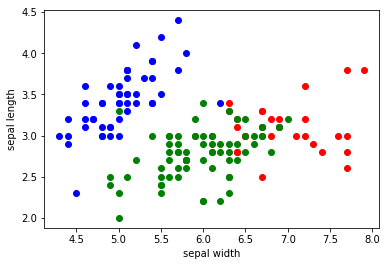

In [8]:
import matplotlib.pyplot as plt
plt.plot(m[0:30], n[0:30],  'ro')
plt.plot(m[30:80], n[30:80],  'bo')
plt.plot(m[80:150], n[80:150],  'go')
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.show()